# Statistics basics
## Final project
Good news! You are hired by some retail company to analyse transaction statistics in a retail chain. (Sorry, this is just an imaginary company so far, but if you successfully finish our program, I'm sure it will become reality.)

You have to use everything that we learned so far to answer questions that are asked by your employer.

Part of the questions require that you write some code that will be automatically tested with autograding. So when you are finished, please, send this work to automatic grading.

The other part of questions are presented in the appropriate quiz. Answer them using your results.

Finally, some problems will be assessed manually. So, please, submit your notebook to staff graded assignment as well.

Note you are not allowed to use loops anywhere in this project!

Let's begin!

### Data

There are three datasets: `customers.csv`, `purchases.csv` and `shops.csv`. They are stored in `data` folder.

`customers.csv` contains information about each customer registered in loyalty program.

`shops.csv` contains information about shops and special offers they organized. One shap can organize several offers and therefore there are usually several rows that correspond to the same shops. However, some shops do not organize special offers at all, but they are presented in this table nevertheless.

`purchases.csv` is a purchase log. It contains information for all customers, either registered in a loyalty program (in this case we know the corresponding customer id) or not registered. One purchase can be a collection of several items, but we see only the total price of everything bought.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
customers = pd.read_csv('https://github.com/mbburova/MDS/raw/main/customers.csv', sep = ',')
purchases = pd.read_csv('https://github.com/mbburova/MDS/raw/main/purchases.csv', sep = ',')
shops = pd.read_csv('https://github.com/mbburova/MDS/raw/main/shops.csv')

In [3]:
purchases['customer_id']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
40397    NaN
40398    NaN
40399    NaN
40400    NaN
40401    NaN
Name: customer_id, Length: 40402, dtype: float64

In [4]:
customers['age']

0      71.0
1      21.0
2      36.0
3      38.0
4      51.0
       ... 
862    53.0
863    62.0
864    23.0
865    28.0
866    22.0
Name: age, Length: 867, dtype: float64

In [5]:
purchases

,customer_id,date,shop_id,total_price
0,0.0,2018-05-04,40,289.673291
1,0.0,2019-01-26,40,1316.898901
2,0.0,2018-11-18,42,159.414367
3,0.0,2018-05-12,42,808.791649
4,0.0,2019-04-20,42,1207.855038
...,...,...,...,...
40397,NaN,2018-05-05,37,169.086474
40398,NaN,2018-09-29,7,310.993395
40399,NaN,2018-10-31,1,17.535630
40400,NaN,2019-02-16,37,218.576020


In [6]:
customers

,customer id,age
0,1149,71.0
1,750,21.0
2,428,36.0
3,360,38.0
4,816,51.0
...,...,...
862,1193,53.0
863,1155,62.0
864,21,23.0
865,468,28.0


Text(0, 0.5, 'count')

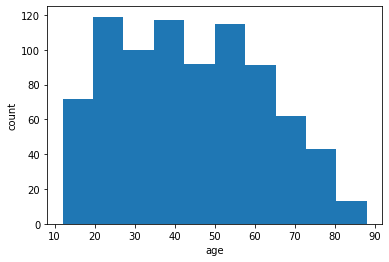

In [11]:
plt.hist(customers['age'], bins=10)
plt.xlabel('age')
plt.ylabel('count')

In [39]:
np.nanpercentile(customers['age'], 50)

43.0

In [41]:
customers['age'].sort_values()[831//2]

43.0

In [29]:
customers['age'].shape

(867,)

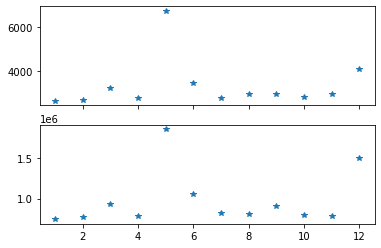

In [44]:
purchases["date"] = pd.to_datetime(purchases["date"])

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True)
ax1.plot(purchases.groupby(purchases["date"].dt.month)['total_price'].count(), '*')
ax2.plot(purchases.groupby(purchases["date"].dt.month)['total_price'].sum(), '*')

In [45]:
shops

,shop_id,offer_begin,offer_end
0,0,2019-02-28,2019-03-13
1,0,2018-07-22,2018-08-10
2,0,2018-09-21,2018-09-27
3,1,NaN,NaN
4,2,NaN,NaN
...,...,...,...
178,72,2018-05-07,2018-05-26
179,73,2019-05-08,2019-06-11
180,74,2018-09-14,2018-10-12
181,74,2018-12-08,2019-01-10


In [150]:
purchases.groupby([purchases.date.dt.month, 'shop_id'])['total_price'].mean()

date  shop_id
1     0          241.562998
      1          236.556164
      2          308.798295
      3          216.317606
      4          191.243990
                    ...    
12    70         392.298768
      71         529.627675
      72         305.593160
      73         299.018209
      74         334.744391
Name: total_price, Length: 900, dtype: float64

In [151]:
shop_means = purchases.groupby([purchases.date.dt.month, 'shop_id'])['total_price'].mean().unstack().T
shop_means

date,1,2,3,4,5,6,7,8,9,10,11,12
shop_id,,,,,,,,,,,,
0,241.562998,314.270412,274.773667,230.820436,250.730568,238.211430,221.974969,380.817517,202.732809,215.609940,229.031047,243.490975
1,236.556164,254.493568,299.033804,228.304553,241.377432,323.394203,195.882800,285.677709,348.547684,222.506663,273.595408,307.988105
2,308.798295,231.334199,323.211837,219.856615,316.690753,358.675216,330.125013,303.952729,303.031873,324.696900,224.476430,377.453485
3,216.317606,177.618519,234.242599,273.430201,217.868408,185.328783,252.006970,210.166147,264.205183,253.669255,219.825518,250.578623
4,191.243990,197.177004,214.254871,233.296251,198.197231,222.441290,202.779374,226.947582,291.576405,258.665440,205.284412,216.818569
...,...,...,...,...,...,...,...,...,...,...,...,...
70,219.804465,315.348001,230.070683,261.674386,316.094971,339.830831,297.537198,209.929063,262.053281,250.032964,202.900924,392.298768
71,400.941187,357.664963,416.915607,458.516293,422.840493,369.427644,443.242101,325.889292,499.793410,361.083542,376.025772,529.627675
72,244.358678,242.730189,232.187133,381.235919,281.941734,296.359413,274.835678,226.983419,252.955604,238.292751,247.884335,305.593160


In [136]:
nov = shop_means[11]
dec = shop_means[12]
nov, dec

(shop_id
 0     229.031047
 1     273.595408
 2     224.476430
 3     219.825518
 4     205.284412
          ...    
 70    202.900924
 71    376.025772
 72    247.884335
 73    198.580037
 74    180.911598
 Name: 11, Length: 75, dtype: float64,
 shop_id
 0     243.490975
 1     307.988105
 2     377.453485
 3     250.578623
 4     216.818569
          ...    
 70    392.298768
 71    529.627675
 72    305.593160
 73    299.018209
 74    334.744391
 Name: 12, Length: 75, dtype: float64)

In [154]:
nov.mean(), dec.mean()

(271.0894846831165, 377.3795952012782)

In [155]:
from scipy import stats

In [157]:
stats.ttest_ind(dec, nov)

Ttest_indResult(statistic=8.149108896744021, pvalue=1.4187033392441126e-13)

In [83]:
customers.columns

Index(['customer id', 'age'], dtype='object')

In [75]:
purchases

,customer_id,date,shop_id,total_price
0,0.0,2018-05-04,40,289.673291
1,0.0,2019-01-26,40,1316.898901
2,0.0,2018-11-18,42,159.414367
3,0.0,2018-05-12,42,808.791649
4,0.0,2019-04-20,42,1207.855038
...,...,...,...,...
40397,NaN,2018-05-05,37,169.086474
40398,NaN,2018-09-29,7,310.993395
40399,NaN,2018-10-31,1,17.535630
40400,NaN,2019-02-16,37,218.576020


In [118]:
purchases_c = purchases.merge(customers, left_on=['customer_id'], right_on=['customer id'], how='inner').drop(['customer id'], axis=1)
purchases_c

,customer_id,date,shop_id,total_price,age
0,0.0,2018-05-04,40,289.673291,38.0
1,0.0,2019-01-26,40,1316.898901,38.0
2,0.0,2018-11-18,42,159.414367,38.0
3,0.0,2018-05-12,42,808.791649,38.0
4,0.0,2019-04-20,42,1207.855038,38.0
...,...,...,...,...,...
28794,1212.0,2018-11-08,60,46.653544,24.0
28795,1212.0,2018-07-20,60,50.592132,24.0
28796,1212.0,2019-04-18,15,95.459705,24.0
28797,1212.0,2019-02-14,60,69.968788,24.0


In [94]:
sum(purchases_c["customer_id"])

17548008.0

In [101]:
purchases_c_mean = purchases_c.groupby('customer_id').mean()
purchases_c_mean

,shop_id,total_price,age
customer_id,,,
0.0,32.333333,711.291471,38.0
2.0,48.562500,380.286822,60.0
3.0,38.500000,392.825462,NaN
4.0,53.000000,349.189551,24.0
5.0,40.000000,472.189806,24.0
...,...,...,...
1206.0,33.000000,251.489294,57.0
1207.0,47.120000,525.552619,42.0
1208.0,36.500000,640.826988,31.0


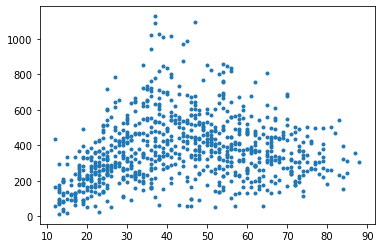

In [103]:
plt.plot(purchases_c_mean['age'], purchases_c_mean['total_price'], '.')

In [105]:
purchases_c_mean_no_na = purchases_c_mean.dropna()
np.corrcoef(purchases_c_mean_no_na['age'], purchases_c_mean_no_na['total_price'])

array([[1.        , 0.16539508],
       [0.16539508, 1.        ]])

In [108]:
stats.pearsonr(purchases_c_mean_no_na['age'], purchases_c_mean_no_na['total_price'])

(0.1653950812077193, 1.811078910330531e-06)

In [114]:
purchases_c.reset_index()

,index,customer_id,date,shop_id,total_price,age
0,0,0.0,2018-05-04,40,289.673291,38.0
1,1,0.0,2019-01-26,40,1316.898901,38.0
2,2,0.0,2018-11-18,42,159.414367,38.0
3,3,0.0,2018-05-12,42,808.791649,38.0
4,4,0.0,2019-04-20,42,1207.855038,38.0
...,...,...,...,...,...,...
28794,28794,1212.0,2018-11-08,60,46.653544,24.0
28795,28795,1212.0,2018-07-20,60,50.592132,24.0
28796,28796,1212.0,2019-04-18,15,95.459705,24.0
28797,28797,1212.0,2019-02-14,60,69.968788,24.0


In [112]:
full_df_preliminary = purchases_c.merge(shops, on=['shop_id'])
full_df_preliminary

,customer_id,date,shop_id,total_price,age,offer_begin,offer_end
0,0.0,2018-05-04,40,289.673291,38.0,2018-08-15,2018-09-10
1,0.0,2019-01-26,40,1316.898901,38.0,2018-08-15,2018-09-10
2,0.0,2019-06-01,40,341.922336,38.0,2018-08-15,2018-09-10
3,0.0,2018-12-22,40,936.012095,38.0,2018-08-15,2018-09-10
4,0.0,2018-06-24,40,1005.693540,38.0,2018-08-15,2018-09-10
...,...,...,...,...,...,...,...
69403,1199.0,2019-04-24,4,149.715169,22.0,2018-08-28,2018-09-04
69404,1199.0,2018-10-17,4,209.615582,22.0,2018-08-28,2018-09-28
69405,1199.0,2018-10-17,4,209.615582,22.0,2018-08-28,2018-09-04
69406,1199.0,2019-05-11,4,666.640059,22.0,2018-08-28,2018-09-28


In [115]:
full_df = purchases_c.reset_index().merge(shops, on=['shop_id'])
full_df

,index,customer_id,date,shop_id,total_price,age,offer_begin,offer_end
0,0,0.0,2018-05-04,40,289.673291,38.0,2018-08-15,2018-09-10
1,1,0.0,2019-01-26,40,1316.898901,38.0,2018-08-15,2018-09-10
2,7,0.0,2019-06-01,40,341.922336,38.0,2018-08-15,2018-09-10
3,9,0.0,2018-12-22,40,936.012095,38.0,2018-08-15,2018-09-10
4,10,0.0,2018-06-24,40,1005.693540,38.0,2018-08-15,2018-09-10
...,...,...,...,...,...,...,...,...
69403,28495,1199.0,2019-04-24,4,149.715169,22.0,2018-08-28,2018-09-04
69404,28496,1199.0,2018-10-17,4,209.615582,22.0,2018-08-28,2018-09-28
69405,28496,1199.0,2018-10-17,4,209.615582,22.0,2018-08-28,2018-09-04
69406,28497,1199.0,2019-05-11,4,666.640059,22.0,2018-08-28,2018-09-28


In [123]:
full_df_preliminary.query('date == "2019-04-24" and customer_id == 555.0')[
    "offer_begin"
]

174    2018-08-15
Name: offer_begin, dtype: object

In [122]:
purchases_c["date"]

0       2018-05-04
1       2019-01-26
2       2018-11-18
3       2018-05-12
4       2019-04-20
           ...    
28794   2018-11-08
28795   2018-07-20
28796   2019-04-18
28797   2019-02-14
28798   2018-07-13
Name: date, Length: 28799, dtype: datetime64[ns]

In [134]:
full_df_offer = full_df
full_df_offer['offer_begin'] = pd.to_datetime(full_df['offer_begin'])
full_df_offer['offer_end'] = pd.to_datetime(full_df['offer_end'])
full_df_offer['offer'] = (full_df_offer['offer_begin'] <= full_df_offer['date']) & (full_df_offer['date'] <= full_df_offer['offer_end'])
full_df_offer

,index,customer_id,date,shop_id,total_price,age,offer_begin,offer_end,offer
0,0,0.0,2018-05-04,40,289.673291,38.0,2018-08-15,2018-09-10,False
1,1,0.0,2019-01-26,40,1316.898901,38.0,2018-08-15,2018-09-10,False
2,7,0.0,2019-06-01,40,341.922336,38.0,2018-08-15,2018-09-10,False
3,9,0.0,2018-12-22,40,936.012095,38.0,2018-08-15,2018-09-10,False
4,10,0.0,2018-06-24,40,1005.693540,38.0,2018-08-15,2018-09-10,False
...,...,...,...,...,...,...,...,...,...
69403,28495,1199.0,2019-04-24,4,149.715169,22.0,2018-08-28,2018-09-04,False
69404,28496,1199.0,2018-10-17,4,209.615582,22.0,2018-08-28,2018-09-28,False
69405,28496,1199.0,2018-10-17,4,209.615582,22.0,2018-08-28,2018-09-04,False
69406,28497,1199.0,2019-05-11,4,666.640059,22.0,2018-08-28,2018-09-28,False
